In [48]:
%matplotlib notebook
import numpy, pickle
#data = pickle.load(open('../../../Xharecost_MS_annex/plot_data_DELETE.pkl','rb'))
#print "DELETE VERSION"
data = pickle.load(open('../../../Xharecost_MS_annex/plot_data.pkl','rb'))
COEFF_ARRAY_INTERNAL_COINS = data['COEFF_ARRAY_INTERNAL_COINS']
coin_flip_params_dict = data['coin_flip_params_dict']
profits_given_coeffs = data['profits_given_coeffs']
no_COIN_FLIPS = data['no_COIN_FLIPS']
instance_base = data['instance_base']
coin_flip_biases_dict = data['coin_flip_biases_dict']


In [49]:
#Absolute additional market share
for coeff_no,coeff_internal in enumerate(COEFF_ARRAY_INTERNAL_COINS):
    #print profits_given_coeffs[coeff_no]['people_count_dict']['additional_people']
    print numpy.median(profits_given_coeffs[coeff_no]['people_count_dict']['additional_people'],axis=1)

[  0.    1.    4.    9.5  18.5  28.   35.5]
[  0.    2.    6.   12.5  22.5  34.   45. ]
[  0.    3.    7.   18.5  25.5  37.   48.5]
[  0.    4.    7.5  21.   33.   45.   55.5]
[  0.    3.5   9.   21.5  37.   50.   59.5]
[  0.    6.   13.5  27.5  43.5  57.   67. ]


In [50]:
#Percentage additional market share
for coeff_no,coeff_internal in enumerate(COEFF_ARRAY_INTERNAL_COINS):
    temp = profits_given_coeffs[coeff_no]['people_count_dict']['additional_people_pct']
    print(numpy.median(temp,axis=1))

[ 0.          0.00793651  0.03174603  0.07539683  0.1468254   0.22222222
  0.28174603]
[ 0.          0.01587302  0.04761905  0.09920635  0.17857143  0.26984127
  0.35714286]
[ 0.          0.02380952  0.05555556  0.1468254   0.20238095  0.29365079
  0.38492063]
[ 0.          0.03174603  0.05952381  0.16666667  0.26190476  0.35714286
  0.44047619]
[ 0.          0.02777778  0.07142857  0.17063492  0.29365079  0.3968254
  0.47222222]
[ 0.          0.04761905  0.10714286  0.21825397  0.3452381   0.45238095
  0.53174603]


In [51]:
#Profit compared to baseline
for coeff_no,coeff_internal in enumerate(COEFF_ARRAY_INTERNAL_COINS):
    temp1  = numpy.median(profits_given_coeffs[coeff_no]['total_profit_array'],axis=1)
    print temp1 - temp1[0]

[   0.         -336.67315512 -243.88553431  -70.16989447 -217.0175439
 -377.91547246 -587.87375007]
[   0.         -302.76628557 -153.40439021  106.52884795   36.62236793
 -200.39409438 -325.02505324]
[   0.         -250.67764304  -40.13984543  284.78880149  -54.34004896
 -148.5470044  -350.83612093]
[   0.         -216.4361378   -46.12127928  428.18587139  217.77381952
  -22.03773661 -160.8904597 ]
[   0.         -247.28403223   64.82117412  365.93997482  277.54845337
   72.51264459  -99.77302008]
[   0.         -135.49389039  208.26411952  691.49145714  526.84624937
  291.4809728    66.86715722]


In [52]:
#Median coin flip probabilities
for coeff_no,coeff_internal in enumerate(COEFF_ARRAY_INTERNAL_COINS):
    #print profits_given_coeffs[coeff_no]['people_count_dict']['additional_people']
    print numpy.median(coin_flip_biases_dict[coeff_no],axis=1)

[ 0.01578947  0.02894737  0.08157895  0.13421053  0.18684211  0.23947368]
[ 0.02105263  0.03859649  0.10877193  0.17894737  0.24912281  0.31929825]
[ 0.02631579  0.04824561  0.13596491  0.22368421  0.31140351  0.39912281]
[ 0.03157895  0.05789474  0.16315789  0.26842105  0.37368421  0.47894737]
[ 0.03684211  0.06754386  0.19035088  0.31315789  0.43596491  0.55877193]
[ 0.05263158  0.09649123  0.27192982  0.44736842  0.62280702  0.79824561]


In [58]:
#Median coin flip probabilities of initial-outside-market-requests
output = numpy.zeros((len(COEFF_ARRAY_INTERNAL_COINS),len(instance_base['instance_params']['GAMMA_ARRAY'])))
for coeff_no,coeff_internal in enumerate(COEFF_ARRAY_INTERNAL_COINS):
    for idx,gamma in enumerate(instance_base['instance_params']['GAMMA_ARRAY']):
        temp_meta = []
        for coin_flip_no in range(no_COIN_FLIPS):
            temp = []
            for i in instance_base['all_requests']:
                #CONDITIONING ON BEING OUTSIDE MARKETSHARE
                if profits_given_coeffs[coeff_no]['instance_dict'][(idx,coin_flip_no)]['all_requests'][i]['PROVIDER_MARKET']['no_gamma']==False:
                    temp.append(coin_flip_biases_dict[coeff_no][idx,i])
            temp_meta.append(numpy.median(numpy.asarray(temp)))
        output[coeff_no,idx] = numpy.median(numpy.asarray(temp_meta))
print output

[[ 0.0075188   0.01378446  0.03884712  0.06390977  0.08897243  0.11403509]
 [ 0.01002506  0.01837928  0.05179616  0.08521303  0.11862991  0.15204678]
 [ 0.01253133  0.0229741   0.0647452   0.10651629  0.14828739  0.19005848]
 [ 0.01503759  0.02756892  0.07769424  0.12781955  0.17794486  0.22807018]
 [ 0.01754386  0.03216374  0.09064327  0.14912281  0.20760234  0.26608187]
 [ 0.02506266  0.0459482   0.12949039  0.21303258  0.29657477  0.38011696]]


<IPython.core.display.Javascript object>


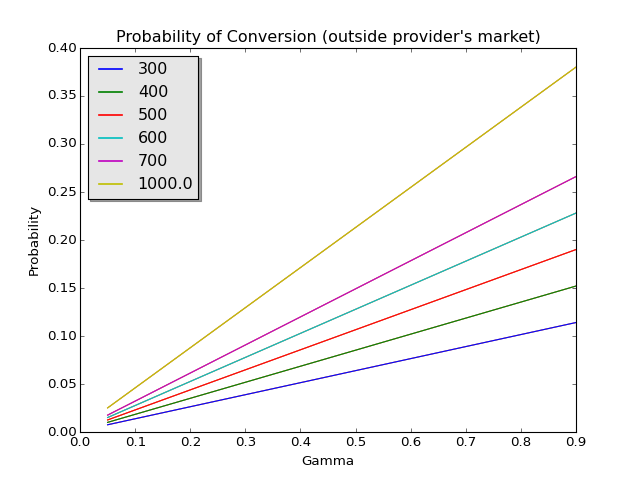

[[ 0.0075188   0.01378446  0.03884712  0.06390977  0.08897243  0.11403509]
 [ 0.01002506  0.01837928  0.05179616  0.08521303  0.11862991  0.15204678]
 [ 0.01253133  0.0229741   0.0647452   0.10651629  0.14828739  0.19005848]
 [ 0.01503759  0.02756892  0.07769424  0.12781955  0.17794486  0.22807018]
 [ 0.01754386  0.03216374  0.09064327  0.14912281  0.20760234  0.26608187]
 [ 0.02506266  0.0459482   0.12949039  0.21303258  0.29657477  0.38011696]]


In [59]:
from plotter import plot_probability_gamma
plot_probability_gamma(data)